In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as scipy
from scipy import signal 
np.random.seed(1)
from scipy.interpolate import interp1d
from matplotlib import pyplot
from matplotlib.pyplot import plot, show,grid
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy.signal import hilbert, chirp
import sys
np.set_printoptions(threshold=sys.maxsize)


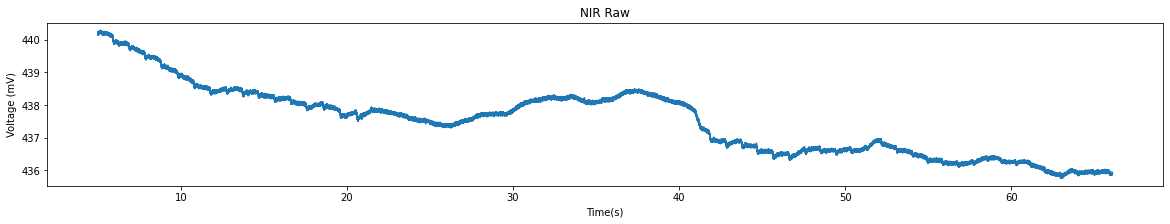

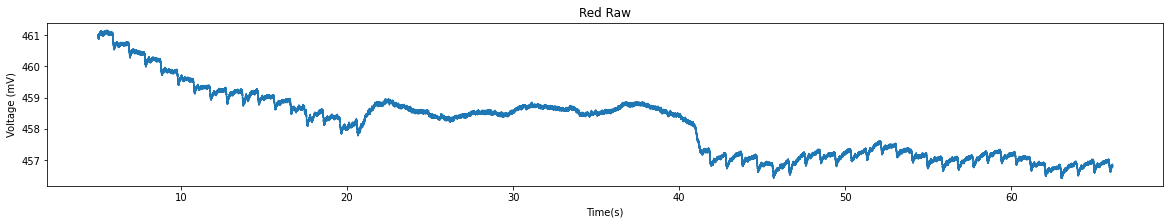

In [22]:
df = sio.loadmat("/Users/annalassiter/Desktop/Lab/wrist_hypoxia_4.mat") # Uploading data into dataframe

plt.rcParams["figure.figsize"] = (20,3) 
TS = 1e-3
FS = int(1/TS)
START = 5 * FS

channel = 0 # Channel starting from 0 

r = df["RED"] 
i = df["NIR"] 
t = df["TIME"]
red  = np.array(r)
nir = np.array(i)
time = np.array(t[START:, ])
# Separates Data into Channel
red_raw = red[ START :, channel]
nir_raw = nir[ START :, channel]

# Plotting Raw Data
plt.plot(time, nir_raw)
plt.title("NIR Raw")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()

plt.plot(time, red_raw)
plt.title("Red Raw")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()


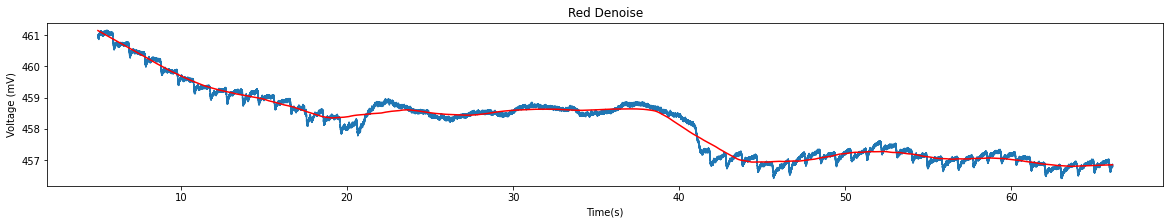

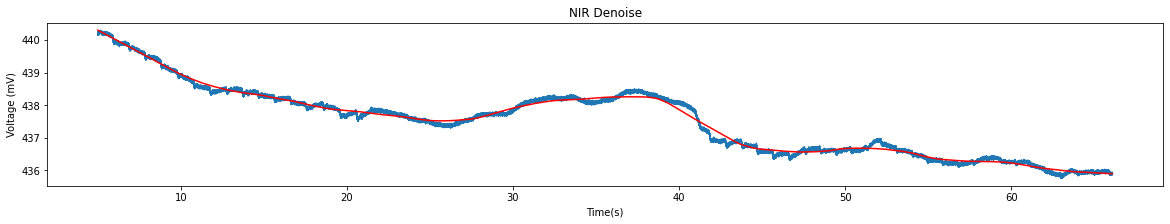

In [23]:
# DC Denoising 
window_length = 5 * FS + 1 # Says must be odd

#Channel 1
x = time
y = red_raw
denoise_red = scipy.signal.savgol_filter(y, int(window_length), 1)
plt.plot(x,y)
plt.plot(x,denoise_red, color='red')
plt.title("Red Denoise")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()

x = time
y = nir_raw
denoise_nir = scipy.signal.savgol_filter(y, int(window_length), 1)
plt.plot(x,y)
plt.plot(x,denoise_nir, color='red')
plt.title("NIR Denoise")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()

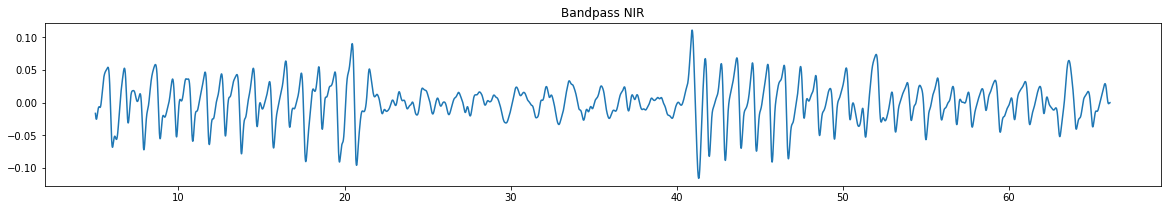

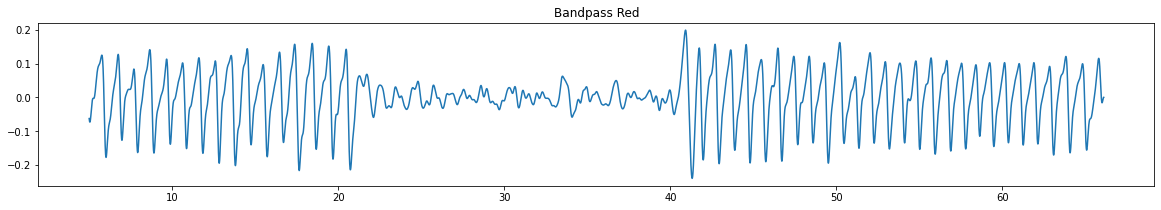

In [24]:
# Bandpass (AC) filter.  Filters out signals that are too high or too low. 
LOWCUT = 0.5
HIGHCUT = 3.0
# NIR 
def bandPassFilter(signal):
    nyq = 0.5 * FS
    low = LOWCUT / nyq
    high = HIGHCUT / nyq
    order = 2

    b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b, a, signal, axis = 0)

    return y

data = nir_raw
filtered_signal = bandPassFilter(data)
plt.plot(time, filtered_signal)
plt.title("Bandpass NIR")
plt.show()

intensity_nir = np.divide(filtered_signal, denoise_nir)

# Red Channel 1
def bandPassFilter(signal):
    nyq = 0.5 * FS
    low = LOWCUT / nyq
    high = HIGHCUT / nyq
    order = 2

    b, a = scipy.signal.butter(order, [low, high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b, a, signal, axis = 0)

    return y

data = red_raw
filtered_signal = bandPassFilter(data)
plt.plot(time, filtered_signal)
plt.title("Bandpass Red")
plt.show()

intensity_red = np.divide(filtered_signal, denoise_red)

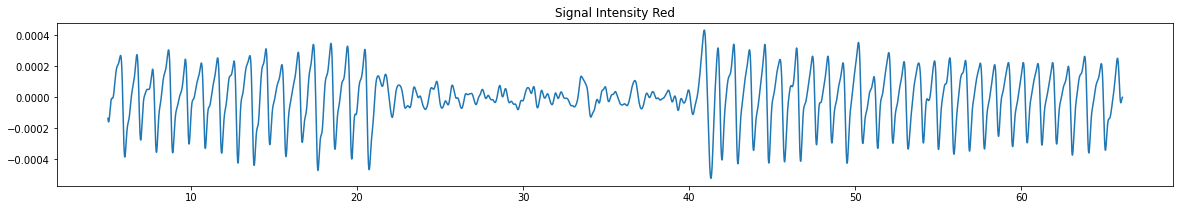

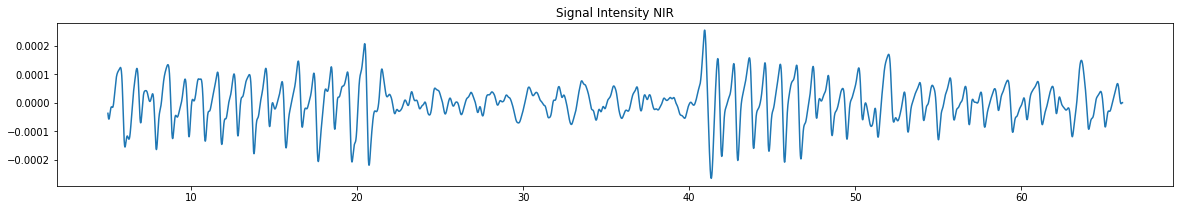

In [25]:
# Signal Intensity

plt.plot(time, intensity_red)
plt.title("Signal Intensity Red")
plt.show()

plt.plot(time, intensity_nir)
plt.title("Signal Intensity NIR")
plt.show()

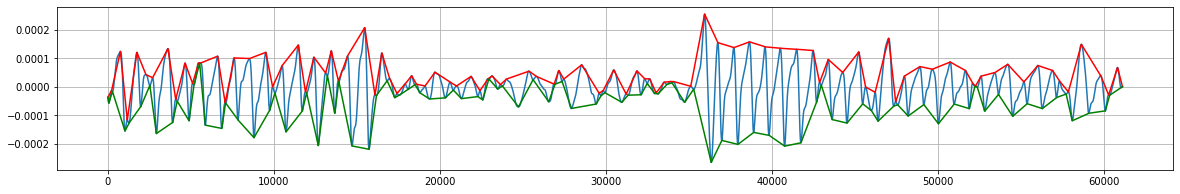

In [26]:
#Envelope 
# NIR 
s = intensity_nir
upper = np.zeros(s.shape)
lower = np.zeros(s.shape)

u_x = [0,]
u_y = [s[0],]
l_x = [0,]
l_y = [s[0],]
for k in range(1,len(s)-1):
    if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
        u_x.append(k)
        u_y.append(s[k])

    if (np.sign(s[k]-s[k-1])==-1) and ((np.sign(s[k]-s[k+1]))==-1):
        l_x.append(k)
        l_y.append(s[k])

u_x.append(len(s)-1)
u_y.append(s[-1])
l_x.append(len(s)-1)
l_y.append(s[-1])
# add 
u_p = interp1d(u_x,u_y, kind = 'slinear',bounds_error = False, fill_value=0.0)
l_p = interp1d(l_x,l_y,kind = 'slinear',bounds_error = False, fill_value=0.0)
for k in range(0,len(s)):
    upper[k] = u_p(k)
    lower[k] = l_p(k)
plot(s);plot(upper,'r');plot(lower,'g');grid(True);
plt.show()
nir_amp = np.subtract(upper, lower)


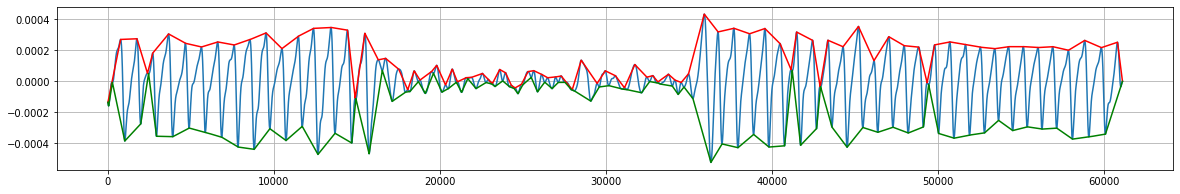

In [27]:
# Red
s = intensity_red
upper = np.zeros(s.shape)
lower = np.zeros(s.shape)

u_x = [0,]
u_y = [s[0],]
l_x = [0,]
l_y = [s[0],]
for k in range(1,len(s)-1):
    if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
        u_x.append(k)
        u_y.append(s[k])

    if (np.sign(s[k]-s[k-1])==-1) and ((np.sign(s[k]-s[k+1]))==-1):
        l_x.append(k)
        l_y.append(s[k])

u_x.append(len(s)-1)
u_y.append(s[-1])
l_x.append(len(s)-1)
l_y.append(s[-1])

u_p = interp1d(u_x,u_y, kind = 'slinear',bounds_error = False, fill_value=0.0)
l_p = interp1d(l_x,l_y,kind = 'slinear',bounds_error = False, fill_value=0.0)
for k in range(0,len(s)):
    upper[k] = u_p(k)
    lower[k] = l_p(k)
plot(s);plot(upper,'r');plot(lower,'g');grid(True);show()
red_amp = np.subtract(upper, lower)

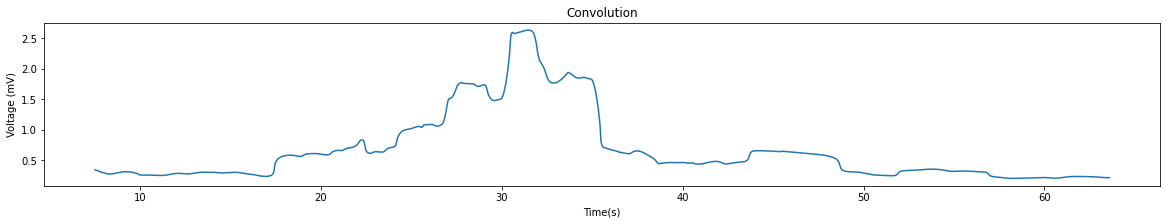

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [39]:
# Convolution 

# Channel 1
log_r = np.log(red_amp + 1)
log_i = np.log(nir_amp + 1)


log_ratio = np.divide(log_i, log_r)
height = 5 * FS
integral_window = np.ones(int(height))
R = np.convolve(log_ratio, integral_window, "same") / height
plt.plot(time, R)
plt.title("Convolution")
plt.xlabel("Time(s)")
plt.ylabel("Voltage (mV)")
plt.show()

print(height)


In [48]:
len(signal.convolve(log_ratio, integral_window, mode='same'))
#log_ratio.shape

61100

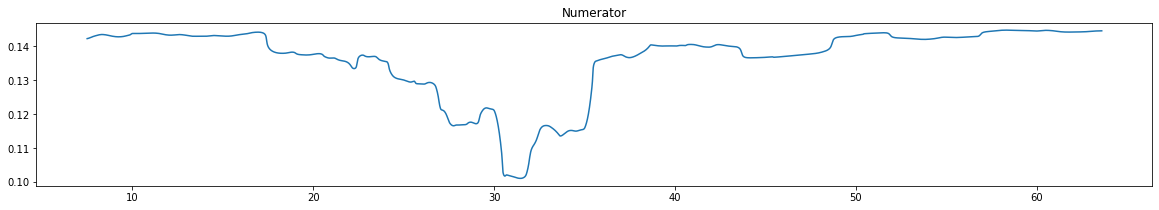

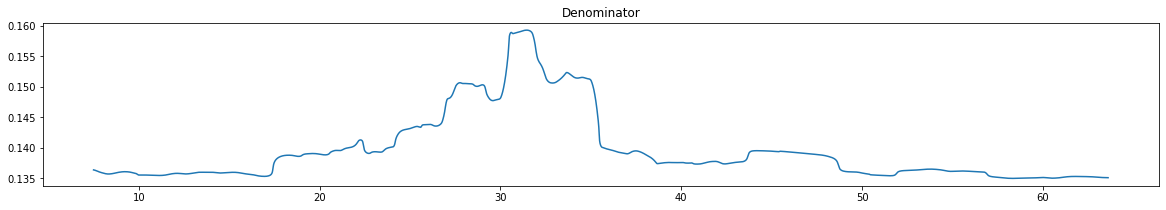

Text(0, 0.5, 'Sp02')

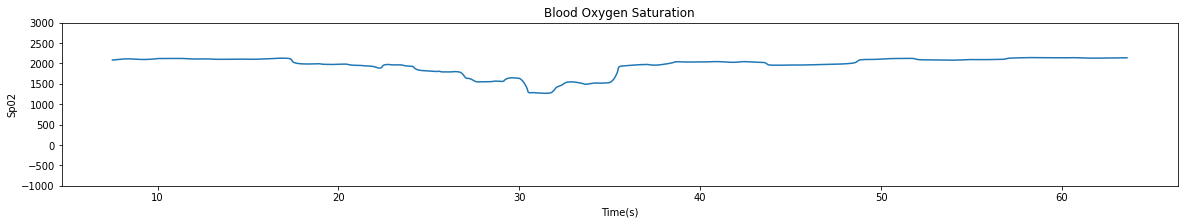

In [29]:
# Blood Oxygen Saturation 
extin_ox_RED = 0.011
extin_ox_NIR = 0.028
extin_deox_RED = 0.106
extin_deox_NIR = 0.018
d_red_nir = 1.4

numerator = extin_deox_RED * d_red_nir * np.ones(len(time)) -  extin_deox_NIR * R
denominator = (extin_deox_RED - extin_ox_RED) * d_red_nir * np.ones(len(time)) + (extin_ox_NIR - extin_deox_NIR) * R
plt.plot(time, numerator)
plt.title("Numerator")
plt.show()
plt.plot(time, denominator)
plt.title("Denominator")
plt.show()
pulse_Sp02 = np.divide(numerator,denominator) #y axis too big
pulse_Sp02_avg = np.convolve(pulse_Sp02, 2 * FS)

plt.plot(time, pulse_Sp02_avg)
plt.ylim(-1e3,3e3)
plt.title("Blood Oxygen Saturation")
plt.xlabel("Time(s)")
plt.ylabel("Sp02")

In [35]:
sys.maxsize

9223372036854775807